# **Cancel Culture - Classification Modeling Notebook**

---

**Author:** Ben McCarty

**Capstone Project** - Predicting hotel reservation cancellations; notebook 2/2

**Contact:** bmccarty505@gmail.com

---

---

**Post-EDA Modeling Notebook**

> After performing my data cleaning and EDA in my prior notebook, I am ready to use the cleaned data to create my predictive models.

**The Basics**

> I will import the usual packages: Pandas, Numpy, Matplotlib, and Seaborn. Additionally, I have several personal functions that I use during the modeling process.

**Modeling**

> I will predominantly use tools from the Scikit-Learn library for my modeling, including pre-processing tools, the models themselves, and the GridSearchCV tool to determine the best hyperparameters for my models.

**Seeing is Believing**

> After developing my models, I will use the Matplotlib and  SHAP packages to generate visualizations of the most impactful features of my best models.

**Recommendations**

> At the end of my workflow, I will provide recommendations for hotels to predict and minimize their cancellations. Additionally, I will make note of the next steps for this process, including ideas for forecasting cancellations in the future.

---

<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Cancel-Culture---Classification-Modeling-Notebook" data-toc-modified-id="Cancel-Culture---Classification-Modeling-Notebook-1"><span class="toc-item-num">1&nbsp;&nbsp;</span><strong>Cancel Culture - Classification Modeling Notebook</strong></a></span></li><li><span><a href="#Imports" data-toc-modified-id="Imports-2"><span class="toc-item-num">2&nbsp;&nbsp;</span><strong>Imports</strong></a></span><ul class="toc-item"><li><span><a href="#Speeding-Up-Scikit-Learn" data-toc-modified-id="Speeding-Up-Scikit-Learn-2.1"><span class="toc-item-num">2.1&nbsp;&nbsp;</span><em>Speeding-Up Scikit-Learn</em></a></span></li></ul></li><li><span><a href="#Reading-the-DataFrames" data-toc-modified-id="Reading-the-DataFrames-3"><span class="toc-item-num">3&nbsp;&nbsp;</span><strong>Reading the DataFrames</strong></a></span></li><li><span><a href="#Train/Test-Split" data-toc-modified-id="Train/Test-Split-4"><span class="toc-item-num">4&nbsp;&nbsp;</span><strong>Train/Test Split</strong></a></span></li><li><span><a href="#Prepping-the-Pipeline" data-toc-modified-id="Prepping-the-Pipeline-5"><span class="toc-item-num">5&nbsp;&nbsp;</span><strong>Prepping the Pipeline</strong></a></span></li><li><span><a href="#Resampling-via-SMOTE" data-toc-modified-id="Resampling-via-SMOTE-6"><span class="toc-item-num">6&nbsp;&nbsp;</span><strong>Resampling via SMOTE</strong></a></span></li><li><span><a href="#Baseline-Model" data-toc-modified-id="Baseline-Model-7"><span class="toc-item-num">7&nbsp;&nbsp;</span><strong>Baseline Model</strong></a></span></li><li><span><a href="#Target-Metric:-Average-Precision" data-toc-modified-id="Target-Metric:-Average-Precision-8"><span class="toc-item-num">8&nbsp;&nbsp;</span><strong>Target Metric: Average Precision</strong></a></span></li><li><span><a href="#Logistic-Regression-Model" data-toc-modified-id="Logistic-Regression-Model-9"><span class="toc-item-num">9&nbsp;&nbsp;</span><strong>Logistic Regression Model</strong></a></span></li><li><span><a href="#Random-Forest-Model" data-toc-modified-id="Random-Forest-Model-10"><span class="toc-item-num">10&nbsp;&nbsp;</span><strong>Random Forest Model</strong></a></span></li><li><span><a href="#ExtraTreesClassifier" data-toc-modified-id="ExtraTreesClassifier-11"><span class="toc-item-num">11&nbsp;&nbsp;</span><strong>ExtraTreesClassifier</strong></a></span></li><li><span><a href="#XGBoost-Classifier" data-toc-modified-id="XGBoost-Classifier-12"><span class="toc-item-num">12&nbsp;&nbsp;</span><strong>XGBoost Classifier</strong></a></span></li><li><span><a href="#GridSearches-and-Results" data-toc-modified-id="GridSearches-and-Results-13"><span class="toc-item-num">13&nbsp;&nbsp;</span><strong>GridSearches and Results</strong></a></span><ul class="toc-item"><li><span><a href="#GS:-Logistic-Regression" data-toc-modified-id="GS:-Logistic-Regression-13.1"><span class="toc-item-num">13.1&nbsp;&nbsp;</span>GS: Logistic Regression</a></span></li><li><span><a href="#GS:-Random-Forest" data-toc-modified-id="GS:-Random-Forest-13.2"><span class="toc-item-num">13.2&nbsp;&nbsp;</span>GS: Random Forest</a></span></li><li><span><a href="#GS:-Extra-Trees-Classifier" data-toc-modified-id="GS:-Extra-Trees-Classifier-13.3"><span class="toc-item-num">13.3&nbsp;&nbsp;</span>GS: Extra Trees Classifier</a></span></li></ul></li><li><span><a href="#Collecting-Coeffcients,-Inspecting-Importances" data-toc-modified-id="Collecting-Coeffcients,-Inspecting-Importances-14"><span class="toc-item-num">14&nbsp;&nbsp;</span><strong>Collecting Coeffcients, Inspecting Importances</strong></a></span><ul class="toc-item"><li><span><a href="#Inspecting-Importances" data-toc-modified-id="Inspecting-Importances-14.1"><span class="toc-item-num">14.1&nbsp;&nbsp;</span>Inspecting Importances</a></span></li><li><span><a href="#Coefficients" data-toc-modified-id="Coefficients-14.2"><span class="toc-item-num">14.2&nbsp;&nbsp;</span><strong>Coefficients</strong></a></span></li></ul></li><li><span><a href="#Interpreting-Results-with-SHAP" data-toc-modified-id="Interpreting-Results-with-SHAP-15"><span class="toc-item-num">15&nbsp;&nbsp;</span><strong>Interpreting Results with SHAP</strong></a></span><ul class="toc-item"><li><span><a href="#Using-TreeExplainer" data-toc-modified-id="Using-TreeExplainer-15.1"><span class="toc-item-num">15.1&nbsp;&nbsp;</span>Using TreeExplainer</a></span></li><li><span><a href="#Dot-Plot" data-toc-modified-id="Dot-Plot-15.2"><span class="toc-item-num">15.2&nbsp;&nbsp;</span>Dot Plot</a></span></li></ul></li><li><span><a href="#Reviewing-Results" data-toc-modified-id="Reviewing-Results-16"><span class="toc-item-num">16&nbsp;&nbsp;</span>Reviewing Results</a></span></li><li><span><a href="#Recommendations" data-toc-modified-id="Recommendations-17"><span class="toc-item-num">17&nbsp;&nbsp;</span>Recommendations</a></span></li><li><span><a href="#Future-Work" data-toc-modified-id="Future-Work-18"><span class="toc-item-num">18&nbsp;&nbsp;</span>Future Work</a></span></li><li><span><a href="#Addendum:-Probabilities" data-toc-modified-id="Addendum:-Probabilities-19"><span class="toc-item-num">19&nbsp;&nbsp;</span>Addendum: Probabilities</a></span></li></ul></div>

# **Imports**

In [2]:
## Jupyter Notebook setting to reload functions when called
%load_ext autoreload
%autoreload 2

In [3]:
## Data Handling
import pandas as pd
import numpy as np

## Visualizations
import matplotlib.pyplot as plt
import seaborn as sns

## Visualizing random forest classifier model results
import shap

## Personal functions
from src import classification as clf


In [4]:
## Settings
%matplotlib inline
sns.set_context("paper", font_scale=1.25)

pd.set_option('display.max_columns', 100)
pd.set_option('display.float_format', lambda x: f'{x:,.2f}')
pd.set_option('display.max_rows', 50)

## *Speeding-Up Scikit-Learn*

---

Due to the size of my dataset, the modeling process took a fair amount of time, especially when testing different model types. To improve my models' runtime, I use a package called "**Intel(R) Extension for Scikit-learn*.**"

This package operates in the background to increase the computational efficiency of certain Scikit-Learn models, including Logistic Regression and Random Forest Classifier models. The package does not affect the model results, though.

This package requires the models to be imported after the package itself in order to perform the patching that results in better run-times.

---

In [5]:
## Speeding up SKLearn via Intel(R) Extension for Scikit-learn*
from sklearnex import patch_sklearn
patch_sklearn()

Intel(R) Extension for Scikit-learn* enabled (https://github.com/intel/scikit-learn-intelex)


In [6]:
## SKLearn and Modeling Tools

from imblearn.combine import SMOTETomek, SMOTEENN
from imblearn.ensemble import BalancedRandomForestClassifier
from imblearn.over_sampling import SMOTE

from sklearn import metrics
from sklearn.compose import ColumnTransformer
from sklearn.dummy import DummyClassifier
from sklearn.ensemble import ExtraTreesClassifier, HistGradientBoostingClassifier, RandomForestClassifier
# from sklearn.impute import SimpleImputer
from sklearn.linear_model import LogisticRegression, LogisticRegressionCV
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import OneHotEncoder, StandardScaler

from xgboost import XGBClassifier

In [7]:
from sklearn import set_config
set_config(transform_output='pandas')

# **Reading the DataFrames**

---

> In my prior EDA notebook, I reviewed, cleaned, and performed some pre-processing steps to prepare my data separately before modeling. I saved the data as a .pickle file to preserve the datatypes; now I will re-read the data for modeling purposes.

---

In [8]:
# data = pd.read_pickle('./data/data_prepped.pickle',
#                            compression = 'gzip')
# data

In [10]:
data = pd.read_parquet('./data/data_prepped.parquet')
data

,IsCanceled,LeadTime,ArrivalDateMonth,ArrivalDateWeekNumber,ArrivalDateDayOfMonth,StaysInWeekendNights,StaysInWeekNights,Adults,Children,Babies,Meal,Country,MarketSegment,IsRepeatedGuest,PreviousCancellations,PreviousBookingsNotCanceled,ReservedRoomType,AssignedRoomType,BookingChanges,DepositType,DaysInWaitingList,CustomerType,ADR,RequiredCarParkingSpaces,TotalOfSpecialRequests,hotel,Agent_group,arrival_date,arrival_day,stay_length
0,0,342,July,27,1,0,0,2,0.00,0,BB,PRT,Direct,0,0,0,C,C,3,No Deposit,0,Transient,0.00,0,0,Resort Hotel,999,2015-07-01,Wednesday,0
1,0,737,July,27,1,0,0,2,0.00,0,BB,PRT,Direct,0,0,0,C,C,4,No Deposit,0,Transient,0.00,0,0,Resort Hotel,999,2015-07-01,Wednesday,0
2,0,7,July,27,1,0,1,1,0.00,0,BB,GBR,Direct,0,0,0,A,C,0,No Deposit,0,Transient,75.00,0,0,Resort Hotel,999,2015-07-01,Wednesday,1
3,0,13,July,27,1,0,1,1,0.00,0,BB,GBR,Corporate,0,0,0,A,A,0,No Deposit,0,Transient,75.00,0,0,Resort Hotel,999,2015-07-01,Wednesday,1
4,0,14,July,27,1,0,2,2,0.00,0,BB,GBR,Online TA,0,0,0,A,A,0,No Deposit,0,Transient,98.00,0,1,Resort Hotel,999,2015-07-01,Wednesday,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
79325,0,23,August,35,30,2,5,2,0.00,0,BB,Other,Offline TA/TO,0,0,0,A,A,0,No Deposit,0,Transient,96.14,0,0,City Hotel,999,2017-08-30,Wednesday,7
79326,0,102,August,35,31,2,5,3,0.00,0,BB,FRA,Online TA,0,0,0,E,E,0,No Deposit,0,Transient,225.43,0,2,City Hotel,999,2017-08-31,Thursday,7
79327,0,34,August,35,31,2,5,2,0.00,0,BB,DEU,Online TA,0,0,0,D,D,0,No Deposit,0,Transient,157.71,0,4,City Hotel,999,2017-08-31,Thursday,7
79328,0,109,August,35,31,2,5,2,0.00,0,BB,GBR,Online TA,0,0,0,A,A,0,No Deposit,0,Transient,104.40,0,0,City Hotel,999,2017-08-31,Thursday,7


# **Train/Test Split**

---

> Prior to modeling, I will divide my data by a 75/25 split to have post-training validation data as my test set.
>
> I will use most of the default settings, with the addition of "stratify = y," which will help preserve the class imbalance of the overall dataset in each of the splits.

---

In [12]:
## Splitting data into features and target variables.
target= 'IsCanceled'

X = data.drop(columns = [target]).copy()
y = data[target].copy()

In [13]:
## Checking for missing values
print(f'Missing values for X:\n {X.isna().sum()}\n')
print(f'Missing values for y: {y.isna().sum()}')

Missing values for X:
 LeadTime                       0
ArrivalDateMonth               0
ArrivalDateWeekNumber          0
ArrivalDateDayOfMonth          0
StaysInWeekendNights           0
StaysInWeekNights              0
Adults                         0
Children                       0
Babies                         0
Meal                           0
Country                        0
MarketSegment                  0
IsRepeatedGuest                0
PreviousCancellations          0
PreviousBookingsNotCanceled    0
ReservedRoomType               0
AssignedRoomType               0
BookingChanges                 0
DepositType                    0
DaysInWaitingList              0
CustomerType                   0
ADR                            0
RequiredCarParkingSpaces       0
TotalOfSpecialRequests         0
hotel                          0
Agent_group                    0
arrival_date                   0
arrival_day                    0
stay_length                    0
dtype: int64

Missin

In [14]:
## Splitting - stratify to maintain class balance b/t X_train/_test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = .25, 
                                                    random_state = 42, 
                                                    stratify = y)

In [15]:
## Saving memory by deleting unused X, y
del X, y

# **Prepping the Pipeline**

---
    
After splitting my data, I will create a pipeline to process my datasets via one-hot encoding and scaling to prepare for modeling.

I will use a column transformer to process my categorical features separately from my continuous features. 
* I will use a OneHotEncoder on the categorical features to convert them into binary features for each category
* I will use the StandardScaler transformer to scale my continuous features.

---

In [29]:
## Specifying numeric columns for preprocessing
num_cols = X_train.select_dtypes('number').columns.to_list()
num_cols

['LeadTime',
 'ArrivalDateWeekNumber',
 'ArrivalDateDayOfMonth',
 'StaysInWeekendNights',
 'StaysInWeekNights',
 'Adults',
 'Children',
 'Babies',
 'IsRepeatedGuest',
 'PreviousCancellations',
 'PreviousBookingsNotCanceled',
 'BookingChanges',
 'DaysInWaitingList',
 'ADR',
 'RequiredCarParkingSpaces',
 'TotalOfSpecialRequests',
 'stay_length']

In [30]:
## Specifying numeric columns for preprocessing
cat_cols = X_train.select_dtypes(include='object').columns.to_list()
cat_cols

['ArrivalDateMonth',
 'Meal',
 'Country',
 'MarketSegment',
 'ReservedRoomType',
 'AssignedRoomType',
 'DepositType',
 'CustomerType',
 'hotel',
 'Agent_group',
 'arrival_day']

In [31]:
## Creating ColumnTransformer and sub-transformers for imputation and encoding

### --- Creating column pipelines --- ###

cat_pipe = Pipeline(steps=[('ohe', OneHotEncoder(drop = 'if_binary',
                                                 handle_unknown='ignore',
                                                 sparse_output=False))])

num_pipe = Pipeline(steps=[('scaler', StandardScaler())])

### --- Instantiating the ColumnTransformer --- ###
preprocessor = ColumnTransformer(
    transformers=[('num', num_pipe, num_cols),
                  ('cat', cat_pipe, cat_cols)])

preprocessor

ColumnTransformer(transformers=[('num',
                                 Pipeline(steps=[('scaler', StandardScaler())]),
                                 ['LeadTime', 'ArrivalDateWeekNumber',
                                  'ArrivalDateDayOfMonth',
                                  'StaysInWeekendNights', 'StaysInWeekNights',
                                  'Adults', 'Children', 'Babies',
                                  'IsRepeatedGuest', 'PreviousCancellations',
                                  'PreviousBookingsNotCanceled',
                                  'BookingChanges', 'DaysInWaitingList', 'ADR',
                                  'RequiredCarParkingSpaces',
                                  'TotalOfSpecialRequests', 'stay_length']),
                                ('cat',
                                 Pipeline(steps=[('ohe',
                                                  OneHotEncoder(drop='if_binary',
                                                                handle_unknown='ignore',
                                                                sparse_output=False))]),
                                 ['ArrivalDateMonth', 'Meal', 'Country',
                                  'MarketSegment', 'ReservedRoomType',
                                  'AssignedRoomType', 'DepositType',
                                  'CustomerType', 'hotel', 'Agent_group',
                                  'arrival_day'])])

In [32]:
## Fitting feature preprocessor
# preprocessor.fit(X_train)

# ## Getting feature names from OHE
# ohe_cat_names = preprocessor.named_transformers_['cat'].named_steps['ohe'].get_feature_names(cat_cols)

# ## Generating list for column index
# final_cols = [*num_cols, *ohe_cat_names]

# final_cols

In [33]:
# ## Transform via the ColumnTransformer preprocessor and create new dataframe

# X_train_df = pd.DataFrame(preprocessor.transform(X_train),
#                              columns=final_cols, index=X_train.index)

# X_test_tf_df = pd.DataFrame(preprocessor.transform(X_test),
#                             columns=final_cols, index=X_test.index)

# display(X_train_df.head(5),X_test_tf_df.head(5))

In [34]:
## Transform via the ColumnTransformer preprocessor and create new dataframe

preprocessor.fit(X_train)

X_train_df = preprocessor.transform(X_train)

X_test_tf_df = preprocessor.transform(X_test)

# display(X_train_df.head(5),X_test_tf_df.head(5))

# **Resampling via SMOTE**

---

> In my EDA notebook, I noted that my target feature has an imbalance of about 2:1 in favor of the negative class. I will use the SMOTE transformer on my training to oversample my positive class, helping to increase my models' performance.

---

In [35]:
# smote = SMOTE(random_state = 42)
# X_train_tf_df, y_train = smote.fit_resample(X_train_df,y_train)

smote_tomek = SMOTETomek(random_state = 42)
X_train_tf_df, y_train = smote_tomek.fit_resample(X_train_df,y_train)

# smoteENN = SMOTE(random_state = 42)
# X_train_tf_df, y_train = smoteENN.fit_resample(X_train_df,y_train)

pd.Series(y_train).value_counts(normalize=True)

IsCanceled
0   0.50
1   0.50
Name: proportion, dtype: float64

# **Baseline Model**

---

**Results:**

> Training balanced accuracy score: 0.5
> 
> Testing balanced accuracy score: 0.5
> 
> * *The scores are the same size.*
>
> Training data log loss: 17.26
>
> Testing data log loss: 17.40

---

**Interpretation**

> I use the `DummyClassifier` model as my baseline model. This model simply predicts the average value for my target, resulting in a score that is equivalent to random chance.
>
> One of my goals with my next models will be to exceed this performance, aiming to maximize the average precision of my models.

---


|-------------------------- Classification Metrics -------------------------|

Training accuracy score: 0.5
Testing accuracy score: 0.63
	- The training score is smaller by 0.13 points.


Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
Series.__setitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To set a value by position, use `ser.iloc[pos] = value`
Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with


Training data log loss: 0.69
Testing data log loss: 0.69


 ------------------- Classification Results: Testing Data ------------------ 

              precision    recall  f1-score   support

           0       0.63      1.00      0.77     18792
           1       0.00      0.00      0.00     11055

    accuracy                           0.63     29847
   macro avg       0.31      0.50      0.39     29847
weighted avg       0.40      0.63      0.49     29847



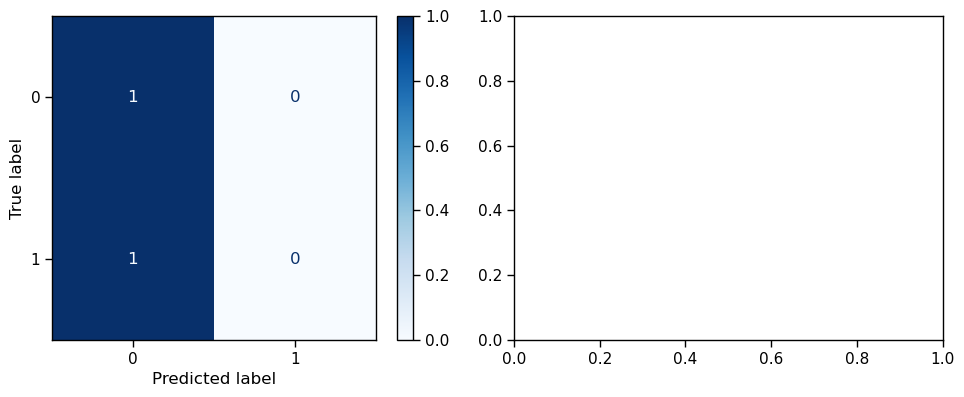

In [36]:
## Creating baseline classifier model

base = DummyClassifier(random_state = 42)
base.fit(X_train_tf_df, y_train)

clf.evaluate_classification(base,
                            X_train = X_train_tf_df, y_train = y_train,
                            X_test = X_test_tf_df, y_test = y_test)

# base.score(X = X_train_tf_df, y = y_train)

# **Target Metric: Average Precision**

---

**My main metric for modeling will be the average precision of the model.** 

I specifically chose to focus on this metric as I want to minimize the number of false positives (classifying a reservation would cancel when it would actually arrive). 

False positives could result in higher costs: if a guest arrives at the hotel and you are over-sold, the hotel (usually) covers the cost of relocating the guest to a different hotel. This incurs the cost of relocation as well as the probable loss of business from that guest as they may feel that the hotel is unreliable.

Additionally, I use the *average* metric as I know my test set's target values are still imbalanced. This is a better evaluation of the model's performance as it takes the imbalance into consideration.

---

# HistGradientBoostingClassifier

In [42]:
hgbc = HistGradientBoostingClassifier(random_state= 42)

hgbc.fit(X_train_tf_df, y_train)

round(hgbc.score(X = X_test_tf_df, y = y_test),4)

0.8586


|-------------------------- Classification Metrics -------------------------|



Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
Series.__setitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To set a value by position, use `ser.iloc[pos] = value`
Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
Series.__setitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To set a value by position, use `ser.iloc[pos] = value`
Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as l

Training average precision score: 0.89
Testing average precision score: 0.85
	- The training score is larger by 0.04 points.

Training data log loss: 0.25
Testing data log loss: 0.31


 ------------------- Classification Results: Testing Data ------------------ 

              precision    recall  f1-score   support

           0       0.88      0.89      0.89     18792
           1       0.81      0.80      0.81     11055

    accuracy                           0.86     29847
   macro avg       0.85      0.85      0.85     29847
weighted avg       0.86      0.86      0.86     29847



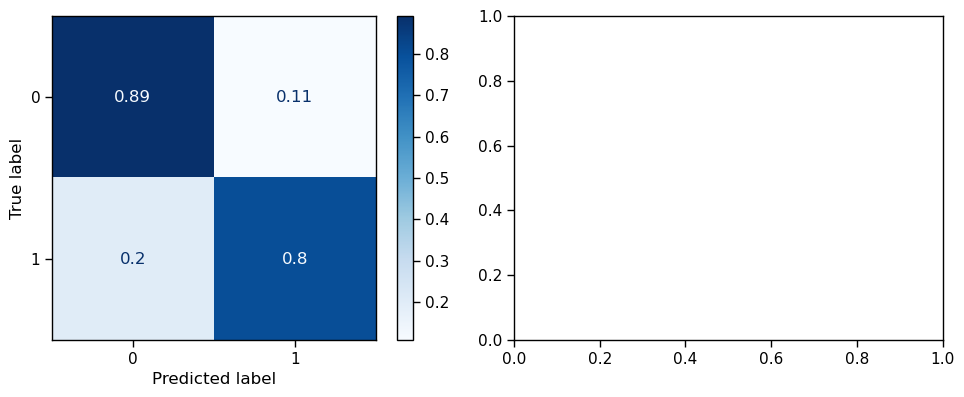


 ------------------ Classification Results: Training Data ------------------ 

              precision    recall  f1-score   support

           0       0.88      0.90      0.89     54923
           1       0.90      0.88      0.89     54923

    accuracy                           0.89    109846
   macro avg       0.89      0.89      0.89    109846
weighted avg       0.89      0.89      0.89    109846



<Figure size 640x480 with 0 Axes>

In [39]:
clf.evaluate_classification(hgbc, train_clf_rpt=True,
                            X_train = X_train_tf_df, y_train = y_train,
                            X_test = X_test_tf_df, y_test = y_test,
                            metric = 'average precision')

In [43]:
y_pred = hgbc.predict(X_test_tf_df)
y_pred

array([0, 0, 1, ..., 0, 0, 0], dtype=int64)

In [44]:
print(metrics.classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.88      0.89      0.89     18792
           1       0.81      0.80      0.81     11055

    accuracy                           0.86     29847
   macro avg       0.85      0.85      0.85     29847
weighted avg       0.86      0.86      0.86     29847



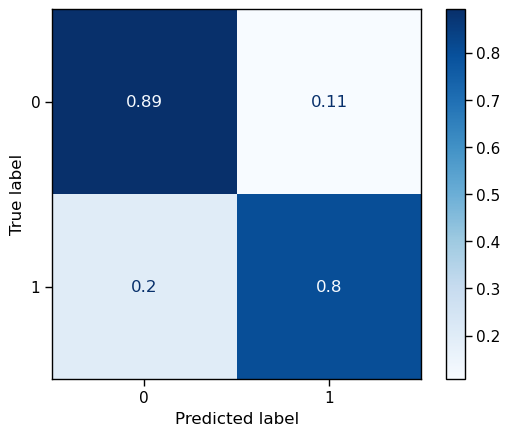

In [45]:
cm = metrics.confusion_matrix(y_test, y_pred, normalize = 'true')

cm_display = metrics.ConfusionMatrixDisplay(cm)

cm_display.from_predictions(y_test, y_pred, normalize = 'true', cmap = 'Blues');

In [ ]:
# cm_display.from_estimator(estimator = hgbc, X = X_test_tf_df, y = y_test, normalize = 'true', cmap = 'Blues')

# **Logistic Regression Model**

In [46]:
## LogReg Model
logreg = LogisticRegression(max_iter = 500, random_state = 42, n_jobs=-1)

logreg.fit(X_train_tf_df, y_train)

LogisticRegression(max_iter=500, n_jobs=1, random_state=42)


|-------------------------- Classification Metrics -------------------------|



Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
Series.__setitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To set a value by position, use `ser.iloc[pos] = value`
Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
Series.__setitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To set a value by position, use `ser.iloc[pos] = value`
Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as l

Training average precision score: 0.81
Testing average precision score: 0.79
	- The training score is larger by 0.02 points.

Training data log loss: 0.39
Testing data log loss: 0.40


 ------------------- Classification Results: Testing Data ------------------ 

              precision    recall  f1-score   support

           0       0.86      0.82      0.84     18792
           1       0.72      0.78      0.75     11055

    accuracy                           0.81     29847
   macro avg       0.79      0.80      0.80     29847
weighted avg       0.81      0.81      0.81     29847



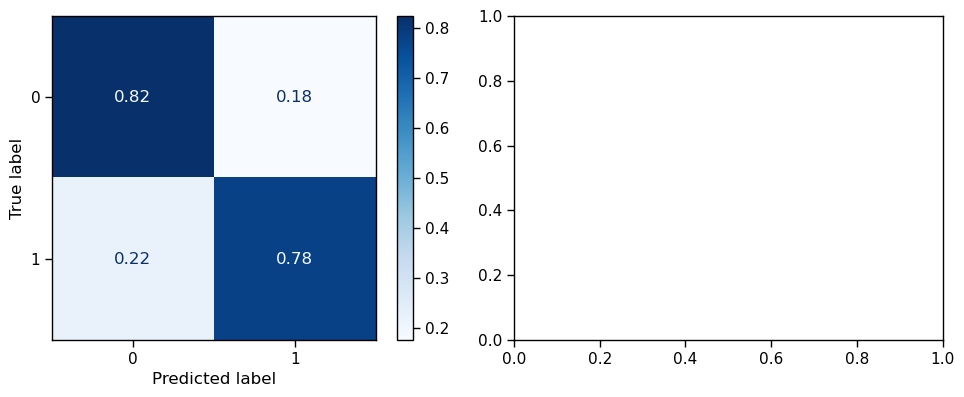

In [47]:
clf.evaluate_classification(logreg, X_train = X_train_tf_df,y_train = y_train,
                           X_test = X_test_tf_df, y_test = y_test,
                          metric = 'average precision')

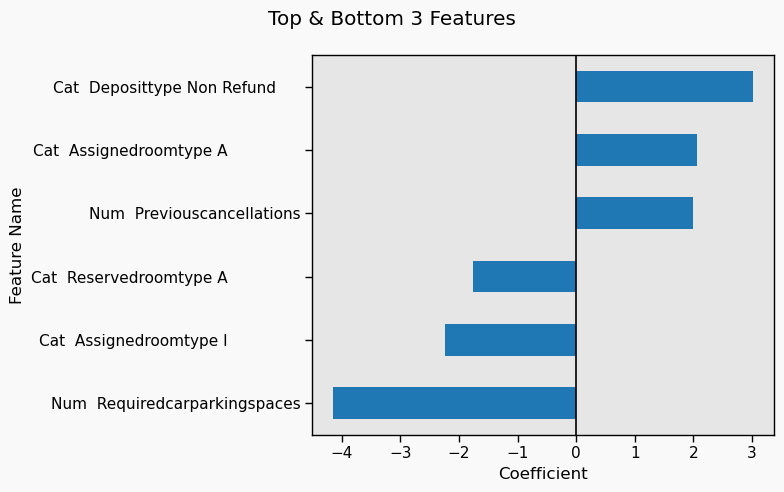

In [48]:
clf.plot_log_odds(logreg, X_test_tf_df)

---

**Results:**

> Training balanced accuracy score: 0.82
> 
> Testing balanced accuracy score: 0.82
> 
> * *The scores are the same size.*
>
> Training data log loss: 0.37
>
> Testing data log loss: 0.37

---

**Interpretation**

> My standard logistic regression performs pretty well with an average precision of 80%. This performance is decent, but I will develop and train additional models to see if I can improve that score.
>
> The top and bottom three features for this model are mostly composed of months of the year - December/November for the highest log-odds of cancellations, respectively, and January/February for the second- and third-lowest log odds, respectively.
>
>
> **These results would make sense when considering business travelers vs. leisure travelers:**
>
>
>   * Leisure travelers may be less experienced travelers and their plans may change more easily, resulting in more cancellations.
>       * The winter holidays would increase leisure travel and decrease business travel as people take time off of work. 
>
>
>   * Business travelers tend to be more experienced and their plans are more established
>       * When the new year begins, people return to work, increasing business travel and decreasing leisure travel.
>
> **The remaining top/bottom features both require some caution to their interpretations:**
* Reservations for room type "P:" due to the anonymous nature of the source data, it is hard to gain much, if any, significant insight from this feature.
    * Room types may vary depending on size, amenities, etc.; without more information about the type of room, the feature has limited value.
* Reservations requiring more parking: during my review of this feature in my EDA notebook, I noted my split feelings about including this feature: it is not guaranteed to be known in advance, and there are significantly more reservations without parking than reservations with parking.
    * This feature is heavily dependent on whether a hotel reliably knows that a guest will need parking or not.
>
> I will continue with additional models to determine whether these results are the best for my recommendations and future modeling.

---

# **Random Forest Model**

In [49]:
rfc = RandomForestClassifier(random_state=42,n_jobs=-1)

rfc.fit(X_train_tf_df, y_train)

RandomForestClassifier(n_jobs=-1, random_state=42)


|-------------------------- Classification Metrics -------------------------|



X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names
Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
Series.__setitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To set a value by position, use `ser.iloc[pos] = value`
Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value b

Training average precision score: 1.0
Testing average precision score: 0.88
	- The training score is larger by 0.12 points.

Training data log loss: 0.06
Testing data log loss: 0.29


 ------------------- Classification Results: Testing Data ------------------ 

              precision    recall  f1-score   support

           0       0.89      0.93      0.91     18792
           1       0.87      0.81      0.84     11055

    accuracy                           0.88     29847
   macro avg       0.88      0.87      0.87     29847
weighted avg       0.88      0.88      0.88     29847



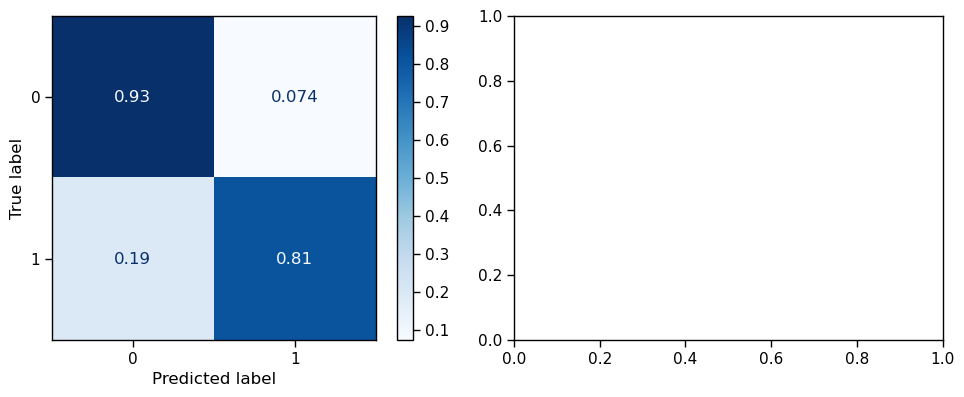

In [50]:
clf.evaluate_classification(rfc, X_train = X_train_tf_df, y_train = y_train,
                           X_test = X_test_tf_df, y_test = y_test,
                          metric = 'average precision')

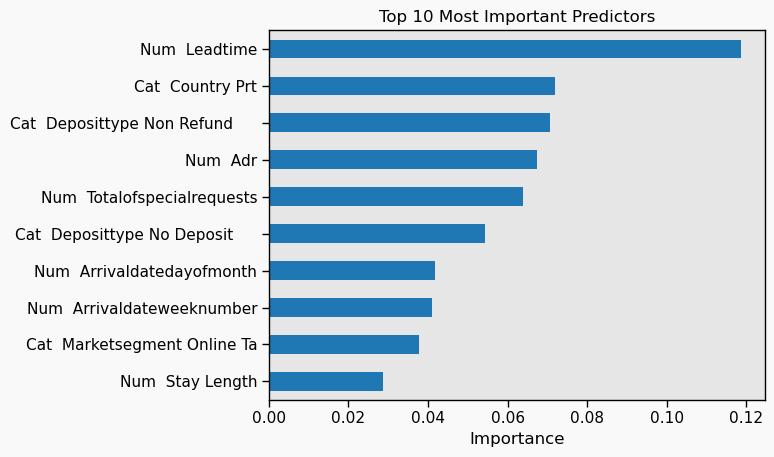

In [51]:
clf.plot_importances(rfc, X_test_tf_df)

---

**Results:**

> Training balanced recall score: 0.96
> 
> Testing balanced recall score: 0.88
>
> * *The training score is larger by 0.08 points.*
>
> Training data log loss: 0.56
>
> Testing data log loss: 0.53

---

**Interpretation**

> The Random Forest Classifier with the default settings shows a larger average precision than the logistic regression: 88% vs. 80%. I am more trusting of this model versus the logistic regression due to this increase in performance.
>
> This model uses feature importances to rank its results. Feature importances are limited in that they do not indicate whether a feature increases or decreases the likelihood of a reservation canceling, however we can use this information for further testing on new results.
>
> The feature importances rank reservations from Portugal and reservation lead times as the top most important features, with the number of special requests and deposit requirements filling out the remaining spots of the top five values.
>
> Interestingly, I see parking spaces was also important for this model, matching the logistic regression results. I am still uncertain about those results, however, and would continue to take them with a grain of salt.

---

# **ExtraTreesClassifier**

In [52]:
etc = ExtraTreesClassifier(random_state=42,n_jobs = -1)

etc.fit(X_train_tf_df, y_train)

ExtraTreesClassifier(n_jobs=-1, random_state=42)


|-------------------------- Classification Metrics -------------------------|



X does not have valid feature names, but ExtraTreesClassifier was fitted with feature names
X does not have valid feature names, but ExtraTreesClassifier was fitted with feature names
X does not have valid feature names, but ExtraTreesClassifier was fitted with feature names
X does not have valid feature names, but ExtraTreesClassifier was fitted with feature names
Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
Series.__setitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To set a value by position, use `ser.iloc[pos] = value`
Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by positi

Training average precision score: 1.0
Testing average precision score: 0.87
	- The training score is larger by 0.13 points.

Training data log loss: 0.01
Testing data log loss: 0.35


 ------------------- Classification Results: Testing Data ------------------ 

              precision    recall  f1-score   support

           0       0.89      0.93      0.91     18792
           1       0.86      0.80      0.83     11055

    accuracy                           0.88     29847
   macro avg       0.87      0.86      0.87     29847
weighted avg       0.88      0.88      0.88     29847



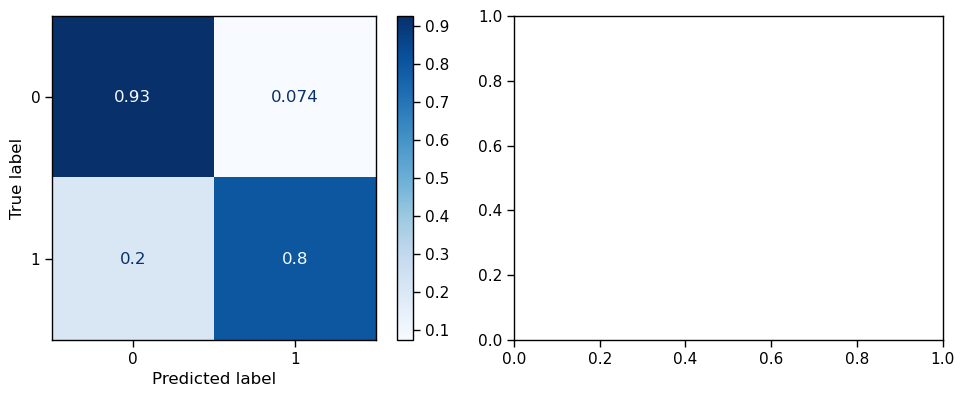

In [53]:
clf.evaluate_classification(etc, X_train = X_train_tf_df, y_train = y_train,
                           X_test = X_test_tf_df, y_test = y_test,
                          metric = 'average precision')

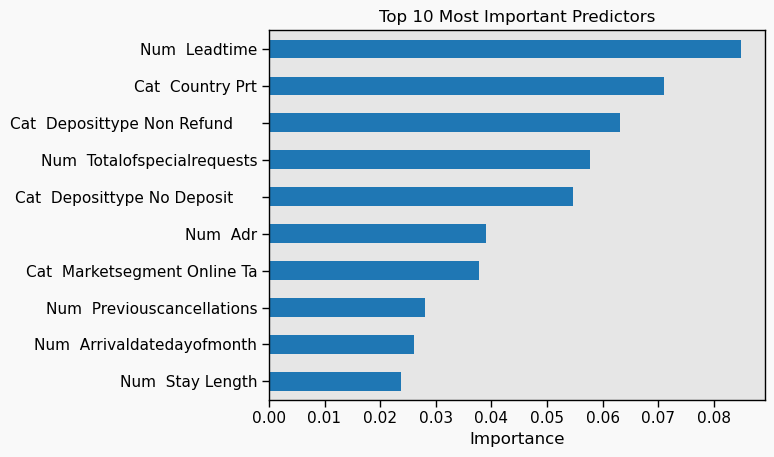

In [54]:
clf.plot_importances(etc, X_test_tf_df)

---

**Results:**

> Training average precision score: 1.0
> 
> Testing average precision score: 0.87
> 
> * 
>
> Training data log loss: 0.01
>
> Testing data log loss: 0.33

---

**Interpretation**

> The Extra Tress Classifier showed similar results as the Random Forest Classifier in terms of scoring and feature importances, but at the expense of increased model complexity and slower run time.
>
> I will continue to consider my Random Forest Classifier as my best model considering its simpler nature and faster runtime - aspects that would have a greater impact with larger datasets.
---

# **XGBoost Classifier**

In [55]:
xgbc = XGBClassifier()
xgbc.fit(X_train_tf_df, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=100, n_jobs=None, num_parallel_tree=None,
              predictor=None, random_state=None, ...)


|-------------------------- Classification Metrics -------------------------|



Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
Series.__setitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To set a value by position, use `ser.iloc[pos] = value`
Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
Series.__setitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To set a value by position, use `ser.iloc[pos] = value`
Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as l

Training balanced recall score: 0.91
Testing balanced recall score: 0.85
	- The training score is larger by 0.06 points.

Training data log loss: 0.21
Testing data log loss: 0.29


 ------------------- Classification Results: Testing Data ------------------ 

              precision    recall  f1-score   support

           0       0.88      0.91      0.89     18792
           1       0.83      0.80      0.82     11055

    accuracy                           0.87     29847
   macro avg       0.86      0.85      0.86     29847
weighted avg       0.87      0.87      0.87     29847



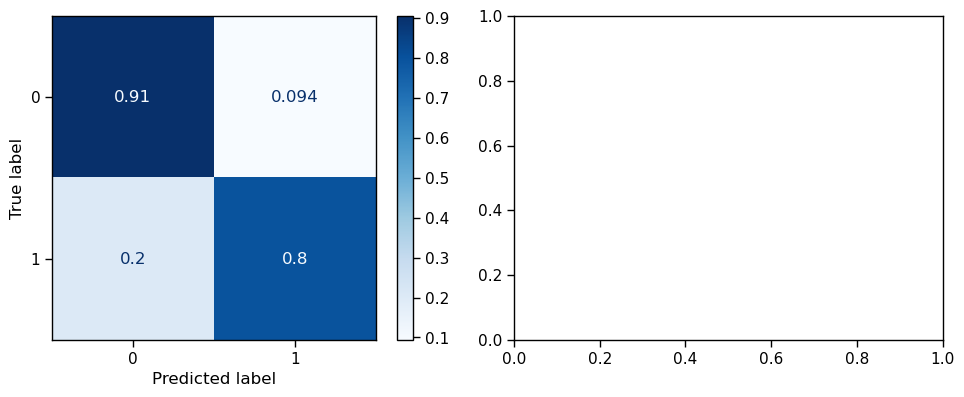

In [56]:
clf.evaluate_classification(xgbc, X_train = X_train_tf_df,y_train = y_train,
                           X_test = X_test_tf_df, y_test = y_test,
                          metric = 'balanced recall')

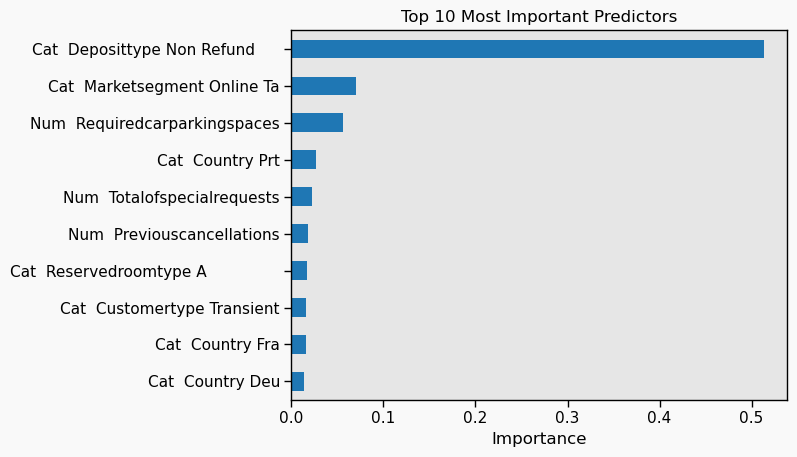

In [57]:
clf.plot_importances(xgbc, X_test_tf_df)

---

**Results:**

> Training average precision score: 1.0
> 
> Testing average precision score: 0.87
> 
> * 
>
> Training data log loss: 0.01
>
> Testing data log loss: 0.33

---

**Interpretation**

> While the XGBoostClassifier model performed about the same as the Random Forest and Extra Trees Classifiers, I noticed that the feature importances are significantly different: **the XGBoost classifier ranks the non-refundable deposits above any other feature, almost to the point of being equivalent to the feature importances of all the other features combined!**
>
> The XGBoostClassifier still ranks Portugal, parking, and "no deposit" features highly, which supports the results of the other tree-based models. While the non-refundable feature importance is a surprising result, I find it somewhat strange to see it ranked so highly above the rest. Since the rest of the results match the results of the other tree-based models,  I will focus on those results.
>
> **Considering the similar results and slightly-worse performance of this model vs. the others, I will continue to stick with the RandomForest model as my best model.**

---

# **GridSearches and Results**

---

**Hyperparameter Tuning**

> After evaluating several model types, I decided that my RandomForestClassifier was my preferred model. **I will now use GridSearchCV to identify the best parameters for this model to maximize its average precision.**
>
> However, the feature importances of a tree-based model limit the interpretability, so I will also tune the logistic regression to see if I can improve its performance and re-evaluate its value in comparison to the RandomForestClassfier.

---

## GS: Logistic Regression

In [ ]:
lg_params = {
    'max_iter': [500, 600, 700],
    'C': [1, 10]
}

In [ ]:
## LogReg Model
lrgs = GridSearchCV(LogisticRegression(random_state = 42),lg_params,
                    scoring = 'average_precision', verbose = 3)

lrgs.fit(X_train_tf_df, y_train)

In [ ]:
clf.evaluate_classification(lrgs, X_train = X_train_tf_df,y_train = y_train,
                           X_test = X_test_tf_df, y_test = y_test)

In [ ]:
lrgs.best_params_

In [ ]:
best_logreg = lrgs.best_estimator_

In [ ]:
clf.plot_log_odds(best_logreg, X_test_tf_df)

---
**Scores**

> Training balanced accuracy score: .82
> 
> Testing balanced accuracy score: .81
> 
> * 
>
> Training data log loss: .38
>
> Testing data log loss: .40

---

**Best Parameters**

> {'C': 10, 'max_iter': 500}

**Interpretation**

> It seems that my initial setting of 500 iterations was the best choice, and a weaker regularization strength of 10 performed better than the default of 1. However, neither the scores or coefficients showed any significant change.
>
> **I will keep these results in mind, but I still believe the RandomForestClassifer is the best model.**


---

## GS: Random Forest

In [ ]:
rfc_params = {'criterion': ['gini', 'entropy'],
              'max_depth': [40,50, 60],
              'min_samples_split': [2,3]
}

rfgs = GridSearchCV(RandomForestClassifier(random_state = 42, n_jobs=-1),
                    rfc_params,scoring = 'average_precision',verbose = 3,
                   cv = 3)

rfgs.fit(X_train_tf_df, y_train)

In [ ]:
rfgs.best_params_

In [ ]:
best_rfc = rfgs.best_estimator_

In [ ]:
clf.evaluate_classification(best_rfc, X_train = X_train_tf_df,y_train = y_train,
                           X_test = X_test_tf_df, y_test = y_test,
                          metric = 'average precision')

In [ ]:
## New Importances
clf.plot_importances(best_rfc, X_test_tf_df)

In [ ]:
## Old Importances
clf.plot_importances(rfc, X_test_tf_df)

---

**Scores**

> Training balanced accuracy score: 1.0
> 
> **Testing balanced accuracy score: .87**
> 
> * *The training score is larger by 0.13 points.*
>
> Training data log loss: .05
>
> Testing data log loss: .30

---

**Best Parameters**

> * criterion : entropy
* max_depth : 60
* min_samples_split : 2

---

**Interpretation**

> The RandomForestClassfier best parameters changed slightly, with a few changes in the feature importances order, but the average precision stayed the same.
>
> The new parameters increased the importance of ADR by a few places, but the other top features remained relatively the same.
>
> Interestingly, despite the average precision not changing, I did notice two secondary metrics improved:
* The log-loss metric decreased (.53 vs .28)
* The AUC score increased (.79 vs. 95)
>
> While I am not focusing on those metrics, they do support the chosen hyperparameters and support my choice to use the RandomForestClassifier as my best model.

---

## GS: Extra Trees Classifier

---

> To confirm my RandomForestClassifier results, I will compare it against a hyper-parameter-tuned ExtraTreesClassifier to ensure my results are in-line with the original results.

---

In [ ]:
# etc_params = {
#     'criterion': ['gini', 'entropy'],
#     'max_depth': [50, 60],
#     'min_samples_leaf': [1,2,3]
# }

In [ ]:
# etgs = GridSearchCV(ExtraTreesClassifier(random_state = 42, n_jobs=-1),etc_params,
#                     scoring = 'average_precision', verbose = 2)

# etgs.fit(X_train_tf_df, y_train)

In [ ]:
# etgs.best_params_

In [ ]:
# best_etc = etgs.best_estimator_

In [ ]:
# clf.evaluate_classification(best_etc, X_train = X_train_tf_df,y_train = y_train,
#                            X_test = X_test_tf_df, y_test = y_test,
#                           metric = 'average precision')

In [ ]:
# clf.plot_importances(best_etc, X_test_tf_df)

---

**Scores**

> Training balanced accuracy score: 1.0
> 
> **Testing balanced accuracy score: .87**
> 
> * *The training score is larger by 0.13 points.*
>
> Training data log loss: .05
>
> Testing data log loss: .30

---

**Best Parameters**

> {'criterion': 'entropy', 'max_depth': 50, 'min_samples_leaf': 1}

---

**Interpretation**

> Even with hyperparameter tuning, the ExtraTreesClassifier did not have better metrics than the RandomForestClassifier. Furthermore, it took *3x* longer to run - nearly 15 minutes in my case.
>
> Due to the runtime increase and lack of improvement in metrics, I will stick with the RandomForestClassifier.

---

# **Collecting Coeffcients, Inspecting Importances**

---

> After performing hyperparameter tuning, I determined my best model is the RandomForestClassfier. As a comparison, I will also review the final coefficients of my logistic regression model to see how the features match up.

---

## Inspecting Importances

In [ ]:
clf.plot_importances(best_rfc, X_test_tf_df)

## **Coefficients**

In [ ]:
clf.plot_log_odds(best_logreg, X_test_tf_df)

---

> The respective results for each model are very different, with only the `required_car_parking_spaces` overlapping between the two. **Due to the better scores and low runtime, I consider my RandomForestClassifier to be the best model.**

---

# **Interpreting Results with SHAP**

---

> **One of the downsides of tree-based models is the difficulty when interpreting the impact of a specific feature.** Feature importances from tree-based models indicate how often a feature was used to make a decision, but they do not indicate if that feature was more or less likely to predict the target feature.
>
> To interpret these results, I will utilize a visualization package called **SHAP** to produce "Shapely values" for each feature. These values indicate each feature's marginal contribution to the model - answering the question, "*How well does the model perform with this feature than without?*"
>
>Using tools within the package, I will focus on the `summary_plot`, which visualizes each feature's Shapely value and the feature's  specific values from low-high (relative to each feature).
>
> More information about SHAP:
* [SHAP Documentation](https://shap.readthedocs.io/en/latest/?badge=latest)
* [SHAP Repository](https://github.com/slundberg/shap)

---

In [ ]:
 ## Initializing Javascript for SHAP models
shap.initjs()

In [ ]:
## Generating a sample of the overall data for review:
X_shap = shap.sample(X_test_tf_df, nsamples=50)

## Using TreeExplainer

---

> The SHAP package includes a few different "Explainer" objects to "explain" the results of different types of models. Since I used a RandomForestClassifier, I will use the "TreeExplainer" to calculate my SHAP values for plotting.

---

In [ ]:
## Initializing an explainer with the RandomForestClassifier model
t_explainer = shap.TreeExplainer(rfgs.best_estimator_)

In [ ]:
## Calculating SHAP values for sample test data
shap_values = t_explainer.shap_values(X_shap)
len(shap_values)

## Dot Plot

---

> Now that I have my SHAP values, I will use them to create a dot plot. This plot consists of three main elements. From left to right:
* **Feature labels**: ranked from most to least impactful for classifying results
* **Feature rows**: each row is a linear representation of the SHAP values for the sampled values for that feature
	* Feature scores may be positive/negative: positive values increase likelihood of a positive classification; negatives decrease the likelihood
	* Features close to zero have little impact on the model
* **Dot colors**: showing magnitude of the values; low values are blue, red values are high

---

In [ ]:
## Preparing column names for visualization labels
X_shap.rename(columns = lambda x: x.title().replace('_', ' '), inplace=True)

In [ ]:
## Better plot
shap.summary_plot(shap_values[1],X_shap,max_display=15)

# Reviewing Results

---

> Based on the results of my RandomForestClassifier and visualization of my SHAP plot, I see that...
* Reservations from Portugal are more likely to cancel vs. reservations from elsewhere
* Reservations with no special requests are more likely to cancel - however any amount of requests may decrease likelihood of cancellation
* Higher lead times show a slightly positive relationship with cancellations
* Reservations listed not as "non-refundable" are less likely to cancel
* Reservations listed as "no deposit" are less likely to cancel

---

# Recommendations

---

**Based on these results, I recommend the following:**
* Contact guests with long lead times to confirm bookings
* Monitor bookings from Portugal versus other countries
* Limit availability of non-refundable rates to prevent/limit risk of cancellations

---

# Future Work

---

In the future, I would like to improve this project by:
* Including whether a reservation is booked over a major holiday to see if they are more/less likely to cancel
* Develop time series forecasts using the daily average cancellation probabilities
* Expanding the forecasts with vector autoregressive forecasting techniques - using more than just probabilities as factors for forecasts
* Determining the likelihood of cancellations within particular windows of time prior to arrival
    * E.g. 0-3, 4-7, or 7-14 days

---

In [ ]:
raise Exception('End of Notebook')

# Addendum: Probabilities

---

> Now that I built and trained my ideal model for predicting cancellations, I will use the probabilities for each observation for time series modeling and forecasting.
>
> In this section, I will simply generate the probabilities required for the time series modeling. Once generated, I will append them to the original dataframe and save it as a new pickled file.

---

In [ ]:
### Reloading the full dataset

data = pd.read_pickle('./data/data_no_assigned.pickle',
                           compression = 'gzip')

In [ ]:
## Splitting data into features and target variable
target= 'is_canceled'

X = data.drop(columns = [target]).copy()
y = data[target].copy()

In [ ]:
## Fitting feature preprocessor
preprocessor.fit(X)

## Getting feature names from OHE
ohe_cat_names = preprocessor.named_transformers_['cat'].named_steps['ohe']\
                                                  .get_feature_names(cat_cols)

## Generating list for column index
final_cols = [*num_cols, *ohe_cat_names]

## Transform via the ColumnTransformer preprocessor and create new dataframe
X_tf_df = pd.DataFrame(preprocessor.transform(X),
                             columns=final_cols, index=X.index)

X_tf_df.head(5)

In [ ]:
## Generating probabilities via best model

y_preds = best_rfc.predict_proba(X_tf_df)
y_preds

In [ ]:
## Creating list of "positive" probabilites

proba_cxl = []
for i in range(len(y_preds)):
    proba_cxl.append(round(y_preds[i][1], 3))

In [ ]:
## Converting list to Series and setting Series name
pos_cxl = pd.Series(proba_cxl)
pos_cxl.rename('cxl_probability', inplace=True)

In [ ]:
## Appending probabilities to original dataframe
data_probs = pd.concat([data, pos_cxl], axis=1)
data_probs

In [ ]:
## Saving the updated dataframe as a new pickle file
## Pickling with Pandas
data_probs.to_pickle(path = './data/data_probs.pickle',
            compression = 'gzip')
print(f'Successfully pickled!')